In [ ]:
import pandas as pd

# Specify the file path and sheet name you want to download
file_path = '/content/AssignmentData.xlsx'  # Path to the original Excel file
sheet_name = 'WorkerFunnel'  # Sheet name to download

# Read the specific sheet from the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Save the sheet to a new Excel file
output_file_path = '/content/workfunnel.xlsx'  # Path for the new Excel file
df.to_excel(output_file_path, index=False)

print(f"Sheet '{sheet_name}' has been saved to '{output_file_path}'")


Sheet 'WorkerFunnel' has been saved to '/content/workfunnel.xlsx'


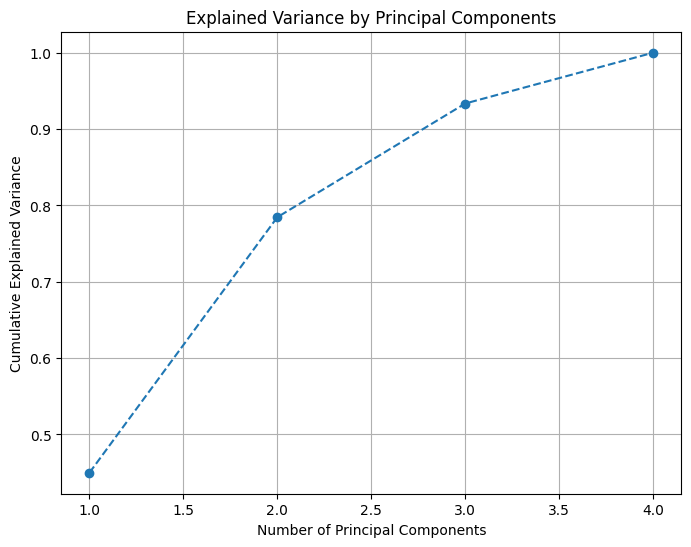

Number of principal components to explain at least 90% of the variance: 3
                            PC1       PC2       PC3       PC4
Targeted Productivity -0.383345 -0.743086 -0.549236  0.008446
Overtime               0.881136 -0.301619 -0.009424  0.365236
No. of Workers         0.878155 -0.309901 -0.028866 -0.364464
Actual Productivity   -0.326496 -0.775048  0.541796 -0.004503


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecasted Productivity for the next 4 quarters (4 weeks):
1162    0.765410
1163    0.782896
1164    0.805187
1165    0.736810
Name: predicted_mean, dtype: float64
MAPE: 0.44941522477190304
MSE: 0.08010841408539289


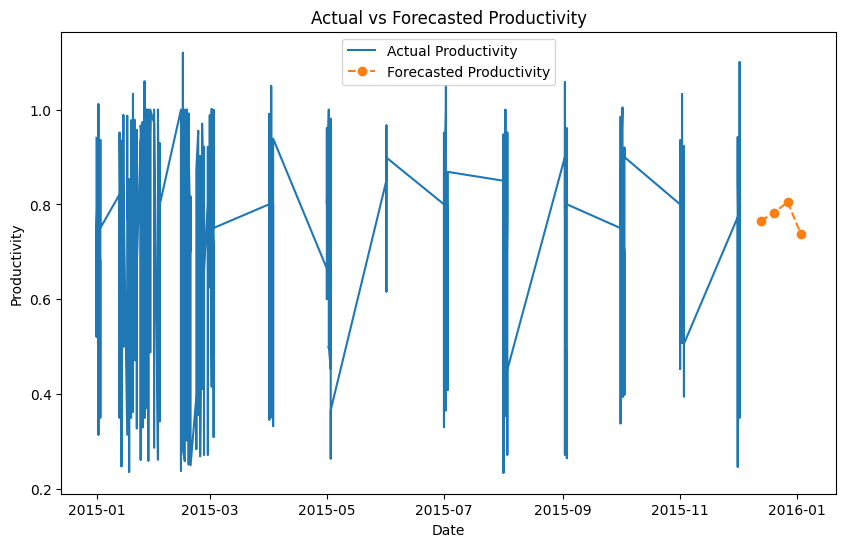

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

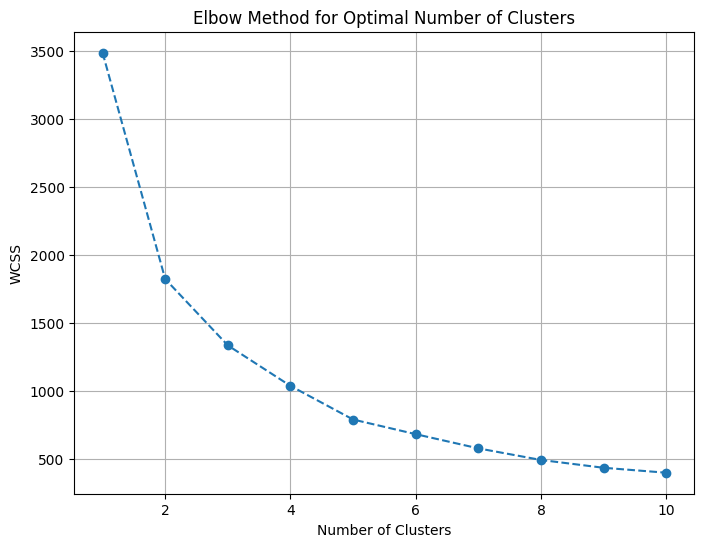

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


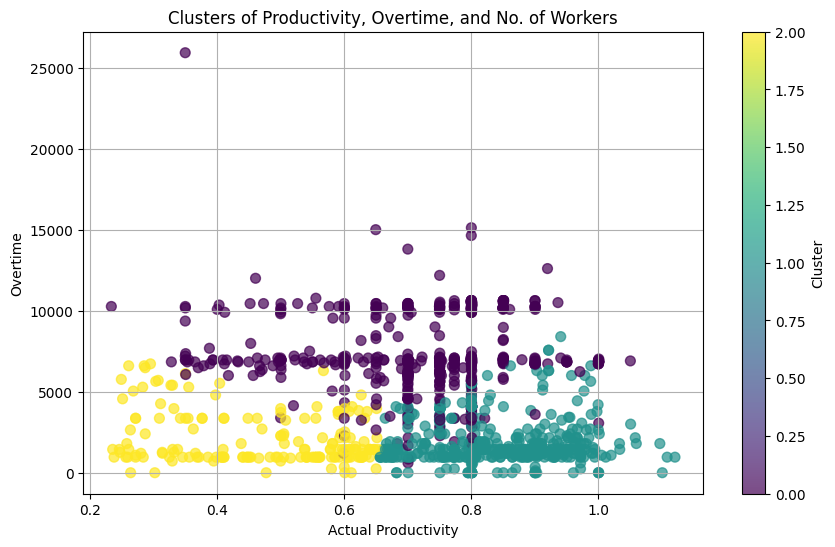

Suggested Budget Allocation based on Department Value:
Department Value    0.000003
dtype: float64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
file_path = '/content/workfunnel.xlsx'  # Path to the Excel file
funnel = pd.read_excel(file_path)  # Load data from the Excel file

# Step 2: Data Cleaning
# Identify non-numeric values and handle them
columns_to_check = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
for column in columns_to_check:
    # Convert non-numeric to NaN
    funnel[column] = pd.to_numeric(funnel[column], errors='coerce')

# Fill missing values (NaN) with median or an appropriate strategy
for column in columns_to_check:
    funnel[column].fillna(funnel[column].median(), inplace=True)

# Remove duplicate rows if any
funnel.drop_duplicates(inplace=True)

# Explanation:
# - Convert non-numeric values to NaN and replace them with the median of their respective columns.
# - Duplicates are removed to ensure data integrity and prevent redundant information from skewing analyses.

# Step 3: Principal Component Analysis (PCA)
# Standardize the data for PCA
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
x = funnel[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(x_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance by each principal component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Determine the number of principal components that explain at least 90% of the variance
num_components = next(i for i, cumulative_variance in enumerate(explained_variance.cumsum(), start=1) if cumulative_variance >= 0.9)
print(f"Number of principal components to explain at least 90% of the variance: {num_components}")

# Component loadings for interpretation
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(features))], index=features)
print(loadings_df)

# Interpretation of PCA Results:
# - The principal components help us understand which combinations of original features (Targeted Productivity, Overtime, etc.)
#   contribute most to the variance in the data.
# - For example, if the first principal component has a high loading for 'Actual Productivity' and 'Overtime',
#   it indicates that these two variables are correlated and drive productivity dynamics in the organization.

# Step 4: ARIMA Model for Time Series Forecasting
# Prepare the Time Series Data
funnel['Date'] = pd.to_datetime(funnel['Date'])
funnel.set_index('Date', inplace=True)
funnel.sort_index(inplace=True)

# Define and fit the ARIMA model
model = ARIMA(funnel['Actual Productivity'], order=(5, 1, 0))  # Example order, may need tuning
model_fit = model.fit()

# Forecast the next four quarters (4 weeks)
forecast = model_fit.forecast(steps=4)

# Display the forecast
print("Forecasted Productivity for the next 4 quarters (4 weeks):")
print(forecast)

# Evaluate the model
y_true = funnel['Actual Productivity'].iloc[-4:]  # Use the last 4 weeks as true values
y_pred = forecast

mape = mean_absolute_percentage_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"MAPE: {mape}")
print(f"MSE: {mse}")

# Visualize the Forecast
plt.figure(figsize=(10, 6))
plt.plot(funnel['Actual Productivity'], label='Actual Productivity')
plt.plot(pd.date_range(funnel.index[-1], periods=5, freq='W')[1:], forecast, label='Forecasted Productivity', linestyle='--', marker='o')
plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.show()

# Interpretation of Forecast Results:
# - The ARIMA model provides a forecast for the next four weeks based on historical data.
# - The MAPE and MSE metrics indicate how close the forecast is to actual values: lower values suggest a better model fit.
# - The visual representation helps to understand the trend and accuracy of the forecasts compared to actual productivity.

# Step 5: Clustering Analysis
# Select relevant features for clustering
features_for_clustering = ['Actual Productivity', 'Overtime', 'No. of Workers']
x_clustering = funnel[features_for_clustering]

# Standardize the data for clustering
scaler_clustering = StandardScaler()
x_scaled_clustering = scaler_clustering.fit_transform(x_clustering)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# From the Elbow method plot, choose the number of clusters (for example, 3)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(x_scaled_clustering)

# Add the cluster labels to the original DataFrame
funnel['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(funnel['Actual Productivity'], funnel['Overtime'], c=funnel['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters of Productivity, Overtime, and No. of Workers')
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Interpretation of Clustering Results:
# - The K-Means clustering helps to identify segments of workers with similar productivity and overtime characteristics.
# - Each cluster represents a group of workers with similar performance and work patterns.
# - The visual representation shows how different segments contribute to overall productivity and can guide targeted strategies.

# Step 6: Budget Allocation Strategy
# Calculate Department Value
funnel['Department Value'] = funnel['Actual Productivity'] / (840000 / 4)  # Assuming 8.4 lakh per quarter divided equally

# Suggest a revised budget allocation strategy to maximize productivity
# For demonstration, we'll assume we suggest reallocating budget based on department value
budget_allocation = funnel[['Department Value']].mean()
print(f"Suggested Budget Allocation based on Department Value:\n{budget_allocation}")

# Interpretation of Budget Allocation Strategy:
# - The Department Value indicates the efficiency of productivity relative to the current budget.
# - By reallocating the budget to departments with higher values, the organization can potentially maximize productivity.



In [ ]:
import pandas as pd

# Specify the file path and sheet name you want to download
file_path = '/content/AssignmentData.xlsx'  # Path to the original Excel file
sheet_name = 'creditcard_test'  # Sheet name to download

# Read the specific sheet from the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Save the sheet to a new Excel file
output_file_path = '/content/creditcard_test.xlsx'  # Path for the new Excel file
df.to_excel(output_file_path, index=False)

print(f"Sheet '{sheet_name}' has been saved to '{output_file_path}'")


Sheet 'creditcard_test' has been saved to '/content/creditcard_test.xlsx'
